In [309]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [310]:
sales = pd.read_csv("dirty_cafe_sales.csv")

In [311]:
sales.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [312]:
sales.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [313]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [314]:
#check how many of the columns have null values and how many null values there are in each

sales.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [315]:
sales["Item"].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [316]:
#select all the values that are not ERROR or UNKNOWN values 

valid_items = sales.loc[~sales["Item"].isin(["UNKNOWN", "ERROR"]), "Item"]

In [317]:
valid_items.value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

In [318]:
#calculate the each items probability based on their frequency / how often they occur

probs = valid_items.value_counts(normalize=True)

In [319]:
probs

Item
Juice       0.129664
Coffee      0.129000
Salad       0.127118
Cake        0.126121
Sandwich    0.125235
Smoothie    0.121360
Cookie      0.120917
Tea         0.120585
Name: proportion, dtype: float64

In [320]:
error_indices = sales[sales["Item"].isin(["ERROR", "UNKNOWN"])].index

In [321]:
#fill the ERROR and UNKNOWN values with random values 
#according to the probability of how often each item appears 
#so the model is not biased on one item 

sales.loc[error_indices, "Item"] = np.random.choice(
    probs.index, 
    size=len(error_indices), 
    p=probs.values
)

In [322]:
sales["Item"].value_counts()

Item
Coffee      1249
Juice       1245
Salad       1219
Sandwich    1217
Cake        1212
Cookie      1179
Smoothie    1173
Tea         1173
Name: count, dtype: int64

In [323]:
sales["Item"].isnull().sum()

np.int64(333)

In [324]:
#Now replace the NULL values with mode / with the most frequent item 

sales["Item"].fillna(sales["Item"].mode()[0],inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11988\182034194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales["Item"].fillna(sales["Item"].mode()[0],inplace = True)


In [325]:
sales["Item"].isnull().sum()

np.int64(0)

In [326]:
sales.isnull().sum()

Transaction ID         0
Item                   0
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [327]:
sales["Quantity"].value_counts()

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

In [328]:
#Replace the UNKNOWn values with NaN values 

sales["Quantity"] = sales["Quantity"].replace("UNKNOWN", np.nan)

In [329]:
#Convert the Quantity column to numeric values
#turning anything that can't be converted into NaN

sales["Quantity"] = pd.to_numeric(sales["Quantity"], errors="coerce")

In [330]:
#filling the NaN values with median values 

sales["Quantity"] = sales["Quantity"].fillna(sales["Quantity"].median())

In [331]:
sales["Quantity"].value_counts()

Quantity
3.0    2328
5.0    2013
2.0    1974
4.0    1863
1.0    1822
Name: count, dtype: int64

In [332]:
sales.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [333]:
sales["Price Per Unit"].value_counts()

Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
UNKNOWN     164
Name: count, dtype: int64

In [334]:
#same as before : to convert this column to numeric
#turning any invalid entries into NaN

sales['Price Per Unit'] = pd.to_numeric(sales['Price Per Unit'], errors='coerce')

In [335]:
#filling the missing values with median value 

median_price = sales['Price Per Unit'].median()
sales['Price Per Unit'].fillna(median_price, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11988\618062020.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Price Per Unit'].fillna(median_price, inplace=True)


In [336]:
sales["Price Per Unit"].value_counts()

Price Per Unit
3.0    2962
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
Name: count, dtype: int64

In [337]:
sales.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [338]:
sales["Total Spent"].value_counts()

Total Spent
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
UNKNOWN    165
ERROR      164
Name: count, dtype: int64

In [339]:
#same as before : to convert this column to numeric
#turning any invalid entries into NaN

sales['Total Spent'] = pd.to_numeric(sales['Total Spent'], errors='coerce')

In [340]:
#to convert the missing values with meedian values 

median_price = sales['Total Spent'].median()
sales['Total Spent'].fillna(median_price, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11988\555100594.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Total Spent'].fillna(median_price, inplace=True)


In [341]:
sales["Total Spent"].value_counts()

Total Spent
8.0     1179
6.0      979
12.0     939
3.0      930
4.0      923
20.0     746
15.0     734
10.0     524
2.0      497
9.0      479
5.0      468
16.0     444
25.0     259
7.5      237
1.0      232
4.5      225
1.5      205
Name: count, dtype: int64

In [342]:
sales["Total Spent"].isnull().sum()

np.int64(0)

In [343]:
sales.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [344]:
sales["Payment Method"].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [345]:
#selaect only the valid payment methods and ignore the UNKNOWN and ERROR payments 

valid_payments_pm = sales.loc[~sales['Payment Method'].isin(['ERROR', 'UNKNOWN']), 'Payment Method']

In [346]:
#to calculate the frequency of the valid payments 

probs_pm = valid_payments_pm.value_counts(normalize=True)

In [347]:
#select the rows where the payment method is ERROR or UNKNOWN

error_indices_pm = sales[sales['Payment Method'].isin(['ERROR', 'UNKNOWN'])].index

In [348]:
#replace the ERROR or UNKNOWN payment method with ramdom values based on their probability 
#or how often they occur 

sales.loc[error_indices_pm, 'Payment Method'] = np.random.choice(
    probs_pm.index, 
    size=len(error_indices_pm), 
    p=probs_pm.values
)

In [349]:
sales["Payment Method"].value_counts()

Payment Method
Digital Wallet    2496
Cash              2464
Credit Card       2461
Name: count, dtype: int64

In [350]:
sales["Payment Method"].isnull().sum()

np.int64(2579)

In [351]:
valid_payments_pm = sales['Payment Method'].dropna()

In [352]:
probs_pm = valid_payments_pm.value_counts(normalize=True)

In [353]:
nan_indices_pm = sales[sales['Payment Method'].isna()].index

In [354]:
#replacing the null values /NaN values with random values
#based on their probability or how often they occur 

sales.loc[nan_indices_pm, 'Payment Method'] = np.random.choice(
    probs_pm.index,
    size=len(nan_indices_pm),
    p=probs_pm.values
)

In [355]:
sales["Payment Method"].isnull().sum()

np.int64(0)

In [356]:
sales.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method         0
Location            3265
Transaction Date     159
dtype: int64

In [357]:
sales["Location"].value_counts()

Location
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [358]:
sales["Location"].isnull().sum()

np.int64(3265)

In [359]:
valid_location = sales.loc[~sales['Location'].isin(['ERROR', 'UNKNOWN']), 'Location']

In [360]:
probs_loca = valid_location.value_counts(normalize=True)

In [361]:
error_indices_loca = sales[sales['Location'].isin(['ERROR', 'UNKNOWN'])].index

In [362]:
#replacing the ERROR or UNKNOWN values with random values 
#based on their probability of occuring 

sales.loc[error_indices_loca, 'Location'] = np.random.choice(
    probs_loca.index, 
    size=len(error_indices_loca), 
    p=probs_loca.values
)

In [363]:
sales["Location"].value_counts()

Location
Takeaway    3372
In-store    3363
Name: count, dtype: int64

In [364]:
sales["Location"].isnull().sum()

np.int64(3265)

In [365]:
valid_location_lo = sales['Location'].dropna()

In [366]:
probs_loca= valid_location_lo.value_counts(normalize=True)

In [367]:
nan_indices_loca = sales[sales['Location'].isna()].index

In [368]:
#now replacing all the missing values or NaN values with random values 
#based on their probability of occuring 

sales.loc[nan_indices_loca, 'Location'] = np.random.choice(
    probs_loca.index,
    size=len(nan_indices_loca),
    p=probs_loca.values
)

In [369]:
sales["Location"].isnull().sum()

np.int64(0)

In [370]:
sales.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    159
dtype: int64

In [371]:
#dropping the transaction date column because we dont need that

sales = sales.drop("Transaction Date", axis=1)

In [372]:
#dropping the transaction ID column because we dont need that

sales = sales.drop("Transaction ID", axis=1)

In [373]:
sales.head()

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway
1,Cake,4.0,3.0,12.0,Cash,In-store
2,Cookie,4.0,1.0,8.0,Credit Card,In-store
3,Salad,2.0,5.0,10.0,Credit Card,Takeaway
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store


In [374]:
#rechecking if there are any null values left 

sales.isnull().sum()

Item              0
Quantity          0
Price Per Unit    0
Total Spent       0
Payment Method    0
Location          0
dtype: int64

In [375]:
print(sales.columns.tolist())


['Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location']


In [376]:
X = sales[['Item', 'Quantity', 'Price Per Unit', 'Payment Method', 'Location']]
y = sales["Total Spent"]

In [377]:
categorical_cols = X.select_dtypes(include="object").columns

In [ ]:
#convert all object columns to pandas category dtype 
#because HistGradientBoostingRegressor is the only model that supports category dtype 

for col in categorical_cols:
    X[col] = X[col].astype("category")

C:\Users\Admin\AppData\Local\Temp\ipykernel_11988\1804646749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype("category")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11988\1804646749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype("category")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11988\1804646749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [379]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [380]:
from sklearn.ensemble import HistGradientBoostingRegressor
hist = HistGradientBoostingRegressor()
hist.fit(X_train , y_train)

,loss,'squared_error'
,quantile,None
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [381]:
preds = hist.predict(X_test)
print(preds)

[ 9.07845631  3.19881432 18.91534903 ...  1.15963756  1.52927793
  4.6959227 ]


In [382]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = hist.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [383]:
print(f"R2 score: {r2:.3f}") #R-squared: how well the model explains the variance
print(f"MAE: {mae:.3f}")  # Mean Absolute Error: average absolute difference
print(f"RMSE: {rmse:.3f}") # Root Mean Squared Error: penalizes larger errors more heavily

R2 score: 0.911
MAE: 0.742
RMSE: 1.749


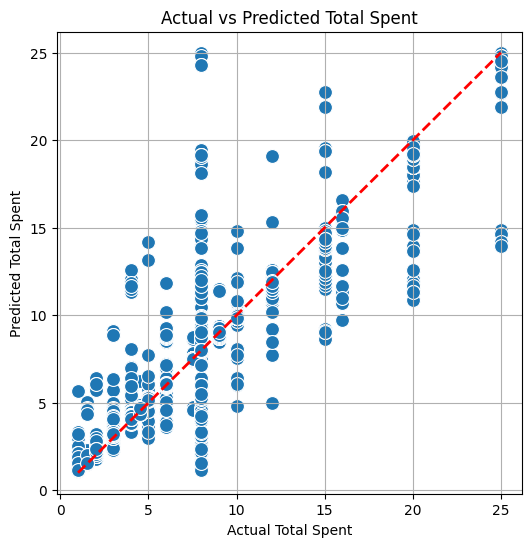

In [ ]:
df_plot = X_test.copy()
df_plot["Actual"] = y_test
df_plot["Predicted"] = y_pred

plt.figure(figsize=(6,6))
sns.scatterplot(x="Actual", y="Predicted", data=df_plot, s=100)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.title("Actual vs Predicted Total Spent")
plt.xlabel("Actual Total Spent")
plt.ylabel("Predicted Total Spent")
plt.grid(True)
plt.show()


# Red line is where the predictions perfectly matches the actual values 

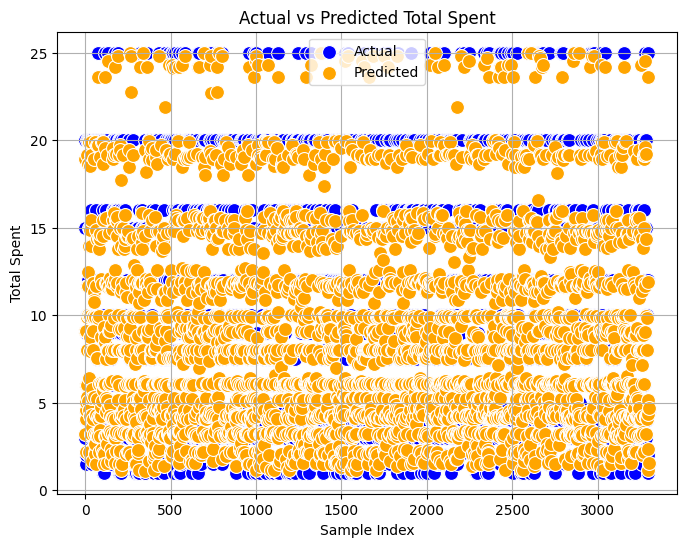

In [385]:
df_plot = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
}, index=X_test.index)

df_plot = df_plot.reset_index(drop=True)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_plot.index, y="Actual", data=df_plot, color="blue", s=100, label="Actual")
sns.scatterplot(x=df_plot.index, y="Predicted", data=df_plot, color="orange", s=100, label="Predicted")

plt.title("Actual vs Predicted Total Spent")
plt.xlabel("Sample Index")
plt.ylabel("Total Spent")
plt.legend()
plt.grid(True)
plt.show()



#This scatter plot shows how predictions (orange) compare to actual values (blue) across all test samples